In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

%matplotlib inline


In [3]:
df = pd.read_csv('rym_top_5000_all_time.csv')

# Top 1000 album analysis
This project aimed to answer the question 
* Which year was the most productive in terms of album production?- 
* What top 1000 albums likely to be?
    * What are their common genres and descriptors?
* Who produced most of the top 1000 albums?

In [4]:
df = pd.read_csv('rym_top_5000_all_time.csv')
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ranking            5000 non-null   float64
 1   Album              5000 non-null   object 
 2   Artist Name        5000 non-null   object 
 3   Release Date       5000 non-null   object 
 4   Genres             5000 non-null   object 
 5   Descriptors        4886 non-null   object 
 6   Average Rating     5000 non-null   float64
 7   Number of Ratings  5000 non-null   object 
 8   Number of Reviews  5000 non-null   int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 351.7+ KB
None


,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
0,1.0,OK Computer,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531
1,2.0,Wish You Were Here,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983
2,3.0,In the Court of the Crimson King,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870
3,4.0,Kid A,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734
4,5.0,To Pimp a Butterfly,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379
...,...,...,...,...,...,...,...,...,...
4995,4996.0,Gracious!,Gracious,17 July 1970,"Progressive Rock, Symphonic Prog",NaN,3.69,565,32
4996,4997.0,Knights of the Cross,Grave Digger,18 May 1998,"Power Metal, Heavy Metal","history, male vocals, heavy, concept album, an...",3.67,562,11
4997,4998.0,(Listen For) The Rag and Bone Man,And Also the Trees,12 November 2007,Art Rock,"atmospheric, poetic, dark, male vocals, ominou...",3.68,524,15
4998,4999.0,Hymnen für elektronische und konkrete Klänge,Studio für elektronische Musik des Westdeutsch...,1969,"Musique concrète, Modern Classical, Electronic","avant-garde, sampling, dense, complex, scary, ...",3.65,536,11


# Data Cleaning
let's start by checking data type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ranking            5000 non-null   float64
 1   Album              5000 non-null   object 
 2   Artist Name        5000 non-null   object 
 3   Release Date       5000 non-null   object 
 4   Genres             5000 non-null   object 
 5   Descriptors        4886 non-null   object 
 6   Average Rating     5000 non-null   float64
 7   Number of Ratings  5000 non-null   object 
 8   Number of Reviews  5000 non-null   int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 351.7+ KB


Release date should be date time and Number of ratings should be numeric

In [6]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Number of Ratings'] = df['Number of Ratings'].str.replace(',','')
df['Number of Ratings'] = df['Number of Ratings'].astype(int)

we only need data of year these albums were made

In [7]:
df['year_release'] = pd.DatetimeIndex(df['Release Date']).year

In [8]:
#See the change we made
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Ranking            5000 non-null   float64       
 1   Album              5000 non-null   object        
 2   Artist Name        5000 non-null   object        
 3   Release Date       5000 non-null   datetime64[ns]
 4   Genres             5000 non-null   object        
 5   Descriptors        4886 non-null   object        
 6   Average Rating     5000 non-null   float64       
 7   Number of Ratings  5000 non-null   int32         
 8   Number of Reviews  5000 non-null   int64         
 9   year_release       5000 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(4)
memory usage: 371.2+ KB


In this project we only focus on the top 1000 albums

In [9]:
top_1000 = df.copy().iloc[0:1000]
top_1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Ranking            1000 non-null   float64       
 1   Album              1000 non-null   object        
 2   Artist Name        1000 non-null   object        
 3   Release Date       1000 non-null   datetime64[ns]
 4   Genres             1000 non-null   object        
 5   Descriptors        999 non-null    object        
 6   Average Rating     1000 non-null   float64       
 7   Number of Ratings  1000 non-null   int32         
 8   Number of Reviews  1000 non-null   int64         
 9   year_release       1000 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(4)
memory usage: 74.3+ KB


Now let's see the null value

In [10]:
top_1000.isnull().sum()

Ranking              0
Album                0
Artist Name          0
Release Date         0
Genres               0
Descriptors          1
Average Rating       0
Number of Ratings    0
Number of Reviews    0
year_release         0
dtype: int64

In [11]:
top_1000['Descriptors'] = top_1000['Descriptors'].fillna('No Data')

There is only 1 null value it should be fine Now let's see the Artist Name are there any extra space and misstyped name

In [12]:
print(f"artist name before : {len(set(top_1000['Artist Name']))} After: {len(set(top_1000['Artist Name'].str.title().str.strip()))}")
print(f"Genres before : {len(set(top_1000['Genres']))} After: {len(set(top_1000['Genres'].str.title().str.strip()))}")
print(f"Before descriptors: {len(set(top_1000['Descriptors']))} After descriptors: {len(set(top_1000['Descriptors'].str.title().str.strip()))}" )

artist name before : 619 After: 619
Genres before : 598 After: 598
Before descriptors: 1000 After descriptors: 1000


In [13]:
top_1000

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews,year_release
0,1.0,OK Computer,Radiohead,1997-06-16,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,70382,1531,1997
1,2.0,Wish You Were Here,Pink Floyd,1975-09-12,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,48662,983,1975
2,3.0,In the Court of the Crimson King,King Crimson,1969-10-10,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,44943,870,1969
3,4.0,Kid A,Radiohead,2000-10-03,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,58590,734,2000
4,5.0,To Pimp a Butterfly,Kendrick Lamar,2015-03-15,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,44206,379,2015
...,...,...,...,...,...,...,...,...,...,...
995,996.0,String Quartets Nos. 1-3,The Tale Quartet,1990-02-01,"Chamber Music, Modern Classical","string quartet, instrumental, acoustic, anxiou...",3.87,591,8,1990
996,997.0,Frances the Mute,The Mars Volta,2005-03-01,"Progressive Rock, Experimental Rock, Art Rock","passionate, complex, cryptic, energetic, surre...",3.77,12222,321,2005
997,998.0,Crazy Rhythms,The Feelies,1980-04-28,Post-Punk,"anxious, rhythmic, energetic, hypnotic, male v...",3.82,7062,127,1980
998,999.0,Starsailor,Tim Buckley,1970-11-02,"Experimental Rock, Avant-Folk, Singer/Songwriter","avant-garde, psychedelic, cryptic, sexual, mal...",3.80,7182,150,1970


In [14]:
top_1000['Artist Name'] =top_1000['Artist Name'].str.title()
top_1000['Genres'] =top_1000['Genres'].str.title()
top_1000['Descriptors'] = top_1000['Descriptors'].str.title()

There is no extra space now let's check is there any mistyped name

In [15]:
artist_name = top_1000['Artist Name'].sort_values().unique()
artist_name

array(['*Namco Consumer Software Sound Team', 'A Tribe Called Quest',
       'Academy Of St Martin In The Fields / Neville Marriner / Alan Loveday',
       'Academy Of St Martin-In-The-Fields / Neville Marriner',
       'Acid Bath', 'Agalloch', 'Akira Yamaoka', 'Al Green',
       'Alice Coltrane', 'Alice Coltrane Featuring Pharoah Sanders',
       'Alice In Chains', 'American Football', 'Amon Düül Ii',
       'Andrew Hill', 'Andrew Lloyd Webber & Tim Rice',
       'Andrew Lloyd Webber And Tim Rice', 'Andrew Prahlow',
       'Angelo Badalamenti', 'Angelo Badalamenti & David Lynch',
       'Animal Collective', 'Anthony Braxton', 'Aphex Twin',
       'Arcade Fire', 'Arditti String Quartet / Dawn Upshaw',
       'Aretha Franklin', 'Art Blakey & The Jazz Messengers',
       'Art Blakey And The Jazz Messengers', 'Artillery',
       'Artur Rubinstein', 'Astor Piazzolla And The New Tango Quintet',
       'At The Drive-In', 'Atheist', 'Autopsy',
       'Avey Tare And Panda Bear', 'Bad Brains',


There are the same author names but with different spellings. Like Academy of St Martin in the Fields and Academy of St Martin-in-the-Fields and there are a lot of different delimiter as well i will change them to ' / '

In [16]:
top_1000['Artist Name'] = top_1000['Artist Name'].str.replace('-',' ')
top_1000['Artist Name'] = top_1000['Artist Name'].str.replace('&','/')
top_1000['Artist Name'] = top_1000['Artist Name'].str.replace(' and ',' / ')
top_1000['Artist Name'] = top_1000['Artist Name'].str.replace('with','/')
top_1000['Artist Name'] = top_1000['Artist Name'].str.replace('featuring','/')

In [17]:
top_1000['Artist Name'].str.split(' / ').explode().sort_values().unique()

array(['*Namco Consumer Software Sound Team', 'A Tribe Called Quest',
       'Academy Of St Martin In The Fields', 'Ace+', 'Acid Bath',
       'Africa 70', 'Agalloch', 'Agnes Baltsa', 'Akira Yamaoka',
       'Al Green', 'Alan Loveday', 'Aldo Brizzi', 'Alfred Schnittke',
       'Alice Coltrane', 'Alice Coltrane Featuring Pharoah Sanders',
       'Alice In Chains', 'American Football', 'Amon Düül Ii',
       'Andreas Scholl', 'Andrew Hill', 'Andrew Lloyd Webber',
       'Andrew Lloyd Webber And Tim Rice', 'Andrew Prahlow',
       'Angelo Badalamenti', 'Animal Collective', 'Anna Tomowa Sintow',
       'Anthony Braxton', 'Antoinette Vischer', 'Antoni Wit',
       'Aphex Twin', 'Arcade Fire', 'Arditti String Quartet',
       'Aretha Franklin', 'Arnold Schoenberg Chor', 'Art Blakey',
       'Art Blakey And The Jazz Messengers', 'Artillery',
       'Artur Rubinstein', 'Asko Ensemble',
       'Astor Piazzolla And The New Tango Quintet', 'At The Drive In',
       'Atheist', 'Autopsy', 'Avey Tar

Now i have to clean the artist name column

In [18]:
top_1000['Artist Name'] = top_1000['Artist Name'].str.replace('The Africa 70','Africa 70')
top_1000['Artist Name'] = top_1000['Artist Name'].str.replace('The Afrika 70','Africa 70')
top_1000['Artist Name'] = top_1000['Artist Name'].str.replace('Afrika 70','Africa 70')
top_1000['Artist Name'] = top_1000['Artist Name'].str.replace('Fela Ransome Kuti','Fela Anikulapo Kuti')
top_1000['Artist Name'] = top_1000['Artist Name'].str.replace('Berlin Philharmonic Orchestra','Berliner Philharmoniker')
top_1000['Artist Name'] = top_1000['Artist Name'].str.replace('Charlie Mingus','Charles Mingus')
top_1000['Artist Name'] = top_1000['Artist Name'].str.replace('The Thelonious Monk Quartet','Thelonious Monk')
top_1000['Artist Name'] = top_1000['Artist Name'].str.replace('Thelonious Monk Septet','Thelonious Monk')
top_1000['Artist Name'] = top_1000['Artist Name'].str.replace('Ennio Morricone e la sua orchestra','Ennio Morricone')
top_1000['Artist Name'] = top_1000['Artist Name'].str.replace('/ Philharmonia Orchestra ','')

now let's check genre column

In [19]:
top_1000['Genres'].str.split(', ').explode().sort_values().unique()

array(['16-Bit', 'Abstract Hip Hop', 'Acid House', 'Acid Jazz',
       'Acid Rock', 'Acoustic Rock', 'Afrobeat', 'Alt-Country',
       'Alternative Dance', 'Alternative Metal', 'Alternative R&B',
       'Alternative Rock', 'Ambient', 'Ambient Pop', 'Ambient Techno',
       'American Folk Music', 'American Primitivism', 'Americana',
       'Art Pop', 'Art Punk', 'Art Rock', 'Atmospheric Black Metal',
       'Atmospheric Sludge Metal', 'Avant-Folk', 'Avant-Garde Jazz',
       'Avant-Garde Metal', 'Avant-Prog', 'Baggy / Madchester',
       'Baroque Music', 'Baroque Pop', 'Berlin School', 'Big Band',
       'Big Beat', 'Black Metal', 'Blue-Eyed Soul', 'Blues Rock',
       'Bolero', 'Boom Bap', 'Bossa Nova', 'Breakbeat',
       'British Folk Rock', 'Britpop', 'Brutal Death Metal',
       'Bulgarian Folk Music', 'Canterbury Scene', "Canzone D'Autore",
       'Caribbean Folk Music', 'Chamber Folk', 'Chamber Music',
       'Chamber Pop', 'Chanson À Texte', 'Chicago Soul', 'Chipmunk Soul',
    

In [20]:
top_1000['Genres'] = top_1000['Genres'].str.replace('Americana','American').str.title()

Now let's do the same with Descriptors column

In [21]:
top_1000['Descriptors'].str.split(', ').explode().sort_values().unique()

array(['...', 'A Cappella', 'Abstract', 'Acoustic', 'Aggressive',
       'Alcohol', 'Alienation', 'Anarchism', 'Androgynous Vocals',
       'Angry', 'Anthemic', 'Anti-Religious', 'Anxious', 'Apathetic',
       'Apocalyptic', 'Aquatic', 'Atmospheric', 'Atonal', 'Autumn',
       'Avant-Garde', 'Ballad', 'Bittersweet', 'Boastful', 'Breakup',
       'Calm', 'Chamber Music', 'Chaotic', 'Choral', 'Christian',
       'Christmas', 'Cold', 'Complex', 'Concept Album', 'Concerto',
       'Conscious', 'Crime', 'Cryptic', 'Dark', 'Deadpan', 'Death',
       'Dense', 'Depressive', 'Desert', 'Dissonant', 'Disturbing',
       'Drugs', 'Eclectic', 'Energetic', 'Ensemble', 'Epic', 'Ethereal',
       'Existential', 'Fairy Tale', 'Fantasy', 'Female Vocals',
       'Folklore', 'Forest', 'Funereal', 'Futuristic', 'Halloween',
       'Happy', 'Hateful', 'Heavy', 'Hedonistic', 'History', 'Humorous',
       'Hypnotic', 'Improvisation', 'Infernal', 'Instrumental',
       'Introspective', 'Jingle', 'Lethargic', '

# Prepare Data for visualization

In [22]:
# Genre and Descriptors of 1000 top song
genre_count = top_1000['Genres'].str.split(', ').explode().value_counts()
genre_count = pd.DataFrame(genre_count).reset_index()
genre_count.columns = ['genre','count']

descriptors_count = top_1000['Descriptors'].str.split(', ').explode().value_counts()
descriptors_count = pd.DataFrame(descriptors_count).reset_index()
descriptors_count.columns = ['decriptors','count']

In [23]:
# Who made the most top 1000 albums and what era of these albums were release
artist_count = top_1000['Artist Name'].str.split(' / ').explode().value_counts()
artist_count = pd.DataFrame(artist_count).reset_index()
artist_count.columns = ['artist','count']

In [24]:
# Top 20 albums by rating
year_count = df['year_release'].value_counts()
year_count = pd.DataFrame(year_count).reset_index()
year_count.columns = ['Year','Album count']
year_count.sort_values('Year',inplace = True)
highest_rating = top_1000.sort_values('Average Rating',ascending= False).head(20)[['Album','Average Rating']]


# Data visualization

In [25]:
top_genre =  genre_count.iloc[0:10]
top_descriptors = descriptors_count.iloc[0:10]
top_artist = artist_count.iloc[0:20]

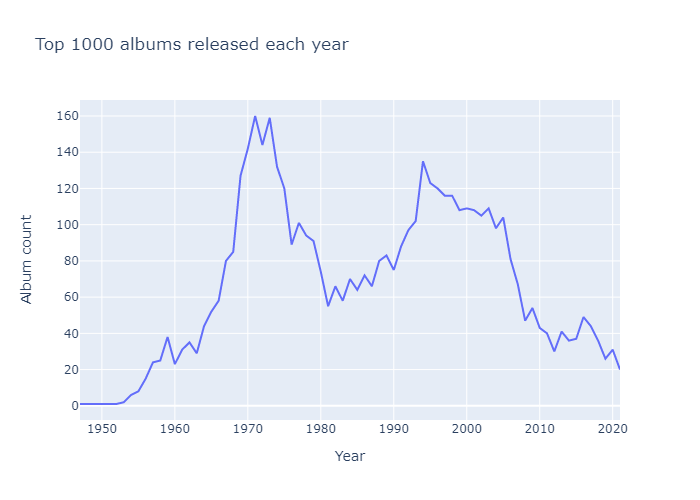

In [26]:
fig = px.line(year_count,x = 'Year',y = 'Album count',title = 'Top 1000 albums released each year')
fig.show("png")

Most of top 1000 albums were produced in 1970s

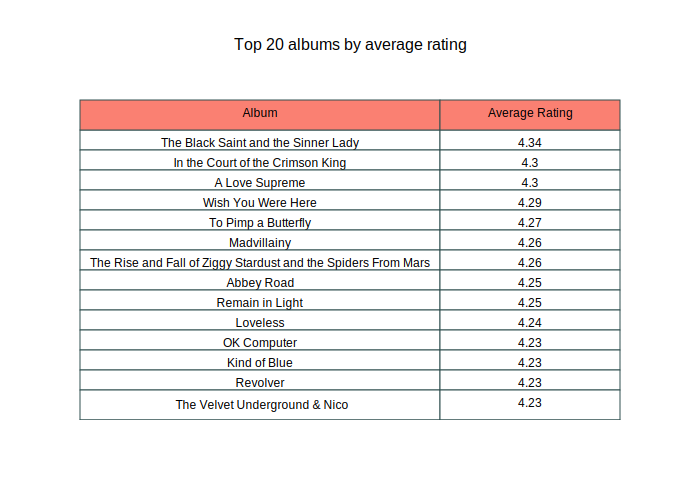

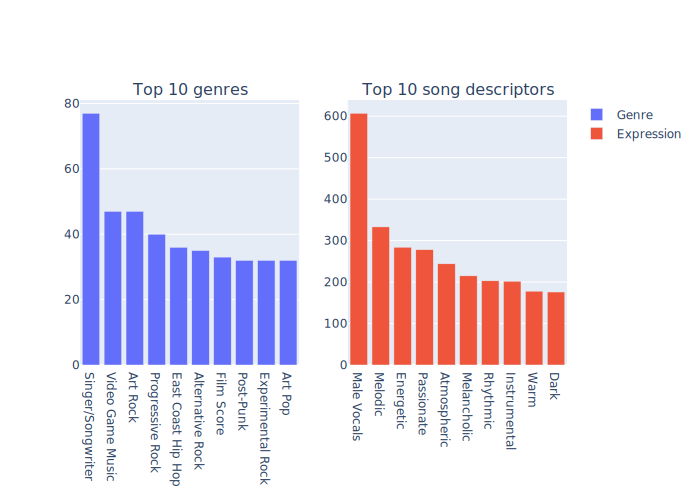

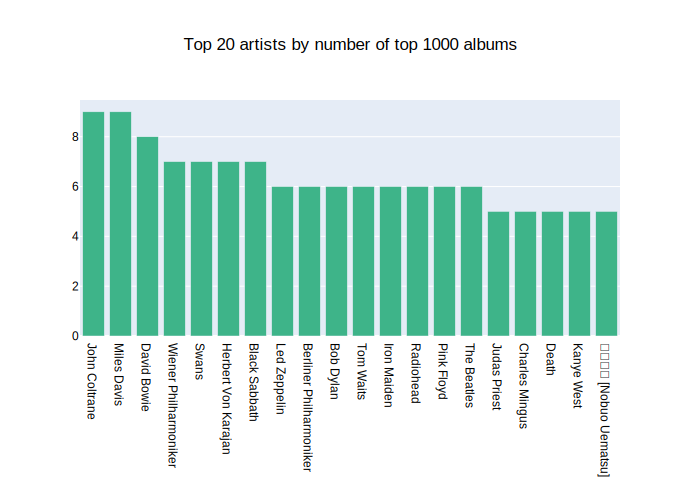

In [27]:
fig_0 = make_subplots(rows = 1,cols = 1, subplot_titles=(''))
fig_0.add_trace(go.Table(columnorder = [1,2],
                         columnwidth = [100,50],
                         header=dict(values=highest_rating.columns, 
                                     line_color='darkslategray',
                                     fill_color='Salmon',
                                     height=30),
                         cells=dict(values=[highest_rating['Album'],
                                    highest_rating['Average Rating']], 
                                    line_color='darkslategray',
                                    fill_color='White')))
fig_0.update_layout(showlegend=False, 
                    title_text='Top 20 albums by average rating', 
                    title_font_size=16, 
                    title_font_family='Arial', 
                    title_x=0.5,
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))
fig_0.show("svg")


fig_1 = make_subplots(rows = 1,cols = 2,subplot_titles = ("Top 10 genres","Top 10 song descriptors"))
fig_1.add_trace(go.Bar(x = top_genre['genre'],y = top_genre['count'],name = 'Genre'),row = 1,col =1,)
fig_1.add_trace(go.Bar(x = top_descriptors['decriptors'],y =top_descriptors['count'],name = 'Expression'),row = 1,col =2)
fig_1.show("svg")

fig_2 = make_subplots(rows = 1,cols = 1, subplot_titles=(''))
fig_2.add_trace(go.Bar(x = top_artist['artist'],y = top_artist['count'],marker_color='#3eb489'))
fig_2.update_layout(title_text='Top 20 artists by number of top 1000 albums', title_x = 0.5,font = dict(family = 'Arial',size = 12,color = 'black'))
fig_2.show("svg")



We can see that John Coltrane and Miles Davis are the most productive artists of top 1000 albums with 9 albums. The most common genres is singer/songwriter but only 77 song from 1000 second are video game music and art rock (47 songs). From song descriptors we learn that a lot of albums were sung by male there are 600 albums with this descriptors second is melodic with 333 albums.

Now let's see what the song genres and descriptors of top 1000 song as word cloud format

In [28]:
from collections import Counter
genres = list(top_1000['Genres'])
gen = []
for i in genres:
    i = list(i.split(', '))
    for j in i:
        gen.append(j) 
g = Counter(gen)

descriptors = list(top_1000['Descriptors'])
des = []
for i in descriptors:
    i = list(i.split(', '))
    for j in i:
        des.append(j)
d = Counter(des)


Song Descriptors


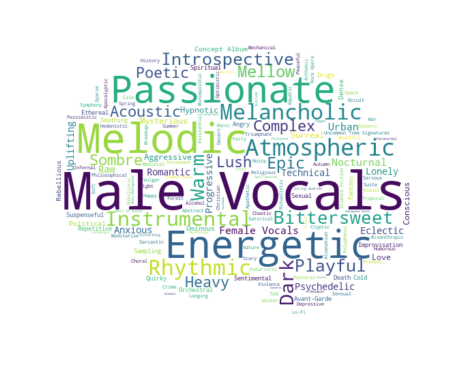

In [29]:
print('Song Descriptors')
from PIL import Image
from wordcloud import WordCloud,STOPWORDS
descriptors = (" ").join(top_1000['Descriptors'])
custom_mask = np.array(Image.open('Brain.jpg'))
wordcloud =  WordCloud(background_color='White',mask = custom_mask,max_font_size=120,)
wordcloud.generate_from_frequencies(d)
#generate plot
plt.figure(figsize=(15,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Genres


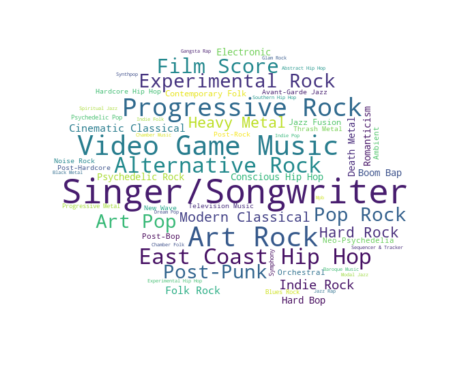

In [30]:
print('Genres')
genre = (" ").join(top_1000['Genres'])
custom_mask = np.array(Image.open('brain.jpg'))
stopwords = set(STOPWORDS)

wordcloud =  WordCloud(background_color='White',mask = custom_mask,stopwords=stopwords,max_font_size=120,max_words=60)
wordcloud.generate_from_frequencies(g)
#generate plot
plt.figure(figsize=(15,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

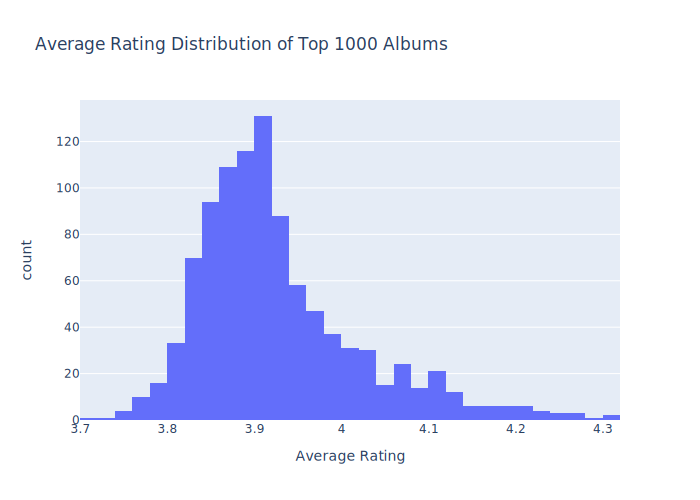

In [31]:
fig = px.histogram(top_1000, x="Average Rating",title='Average Rating Distribution of Top 1000 Albums')
fig.show("svg")

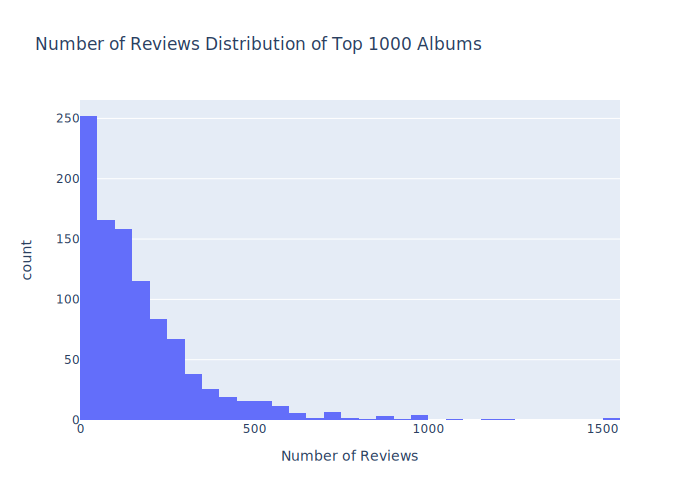

In [41]:
fig = px.histogram(top_1000, x="Number of Reviews",title='Number of Reviews Distribution of Top 1000 Albums')
fig.show('svg')

from now on we will try to do classification to see the pattern in data start by changing format and structure of this dataset

# Clean Genres and Descriptors for clustering

In [33]:
cluster_df = top_1000.copy()

### Genres

In [34]:
genre_split =cluster_df['Genres'].str.split(', ').apply(pd.Series).stack()
genre_split.index = genre_split.index.droplevel(-1)
genre_split.name = 'Genres'
del cluster_df['Genres']


In [35]:
cluster_df = cluster_df.join(genre_split)
dummy_gen = pd.get_dummies(cluster_df['Genres'],prefix ='Gen')
dummy_gen = dummy_gen.reset_index().groupby('index').sum()
cluster_df = cluster_df.drop_duplicates('Ranking',keep='first').drop('Genres',axis=1)

In [36]:
cluster_df

,Ranking,Album,Artist Name,Release Date,Descriptors,Average Rating,Number of Ratings,Number of Reviews,year_release
0,1.0,OK Computer,Radiohead,1997-06-16,"Melancholic, Anxious, Futuristic, Alienation, ...",4.23,70382,1531,1997
1,2.0,Wish You Were Here,Pink Floyd,1975-09-12,"Melancholic, Atmospheric, Progressive, Male Vo...",4.29,48662,983,1975
2,3.0,In the Court of the Crimson King,King Crimson,1969-10-10,"Fantasy, Epic, Progressive, Philosophical, Com...",4.30,44943,870,1969
3,4.0,Kid A,Radiohead,2000-10-03,"Cold, Melancholic, Futuristic, Atmospheric, An...",4.21,58590,734,2000
4,5.0,To Pimp a Butterfly,Kendrick Lamar,2015-03-15,"Political, Conscious, Poetic, Protest, Concept...",4.27,44206,379,2015
...,...,...,...,...,...,...,...,...,...
995,996.0,String Quartets Nos. 1-3,The Tale Quartet,1990-02-01,"String Quartet, Instrumental, Acoustic, Anxiou...",3.87,591,8,1990
996,997.0,Frances the Mute,The Mars Volta,2005-03-01,"Passionate, Complex, Cryptic, Energetic, Surre...",3.77,12222,321,2005
997,998.0,Crazy Rhythms,The Feelies,1980-04-28,"Anxious, Rhythmic, Energetic, Hypnotic, Male V...",3.82,7062,127,1980
998,999.0,Starsailor,Tim Buckley,1970-11-02,"Avant-Garde, Psychedelic, Cryptic, Sexual, Mal...",3.80,7182,150,1970


### Descriptors

In [37]:
des_split =cluster_df['Descriptors'].str.split(', ').apply(pd.Series).stack()
des_split.index = des_split.index.droplevel(-1)
des_split.name = 'Descriptors'
del cluster_df['Descriptors']

In [38]:
cluster_df = cluster_df.join(des_split)

dummy_des = pd.get_dummies(cluster_df['Descriptors'],prefix ='Des')
dummy_des = dummy_des.reset_index().groupby('index').sum()
cluster_df = cluster_df.drop_duplicates('Ranking',keep='first').drop('Descriptors',axis=1)

In [39]:
cluster_df = pd.concat([cluster_df,dummy_gen],axis=1)
cluster_df = pd.concat([cluster_df,dummy_des],axis=1)

# Clustering

First ill try to make elbow plot to find optimal K value for KMeans

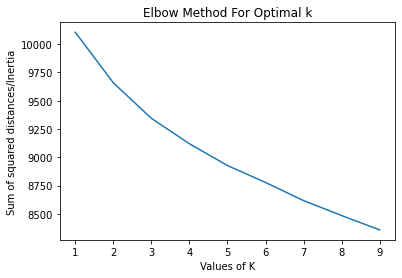

In [40]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters,random_state=1)
 kmeans.fit_transform(cluster_df.iloc[:,8:])
 Sum_of_squared_distances.append(kmeans.inertia_)
 
plt.plot(K,Sum_of_squared_distances)
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()


It seems like we cant do classification in this dataset as there is no clear elbow in elbow plot

# Conclusion
Most of top 1000 albums were made in 1970s. The most productive artists of those albums were John Coltrane and Miles Davis with 9 Albums. There is no clear pattern in what top 1000 albums are likely to be we only know that more than half are sung by male artist.
